In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Define variables and functs

In [2]:
from scipy import optimize

def SineFit(t,v,freq):
    params, params_covariance = optimize.curve_fit(SineFunc,t,v,p0=[freq,np.pi/2.0,350])#,bounds=([-np.inf,-np.inf,200],[np.inf,np.inf,np.inf]))#freq,offset,amplitude,voff
    if(params[2]<0):
        params[2]=np.abs(params[2])
        params[1]=params[1]+np.pi
    params[1]=params[1]%(np.pi*2)
    while(params[1]<0):
        params[1]=params[1]+np.pi*2.0
    return(params)
def SineFunc(t,k,phi,A): #time, freq, offset, amplitude
    return A*np.sin(2*np.pi*k*t-phi)



In [325]:
ch = 1
pol = 0
run = 2840

In [327]:
time = np.load('./time_%i_%i0100.npy'%(run,ch))
voltage = np.load('./volts_%i_%i0100.npy'%(run,ch))
# voltage_final = np.load('./volts_%i_%i0111.npy'%(run,ch))
time_final = np.load('./time_%i_%i0110.npy'%(run,ch))
voltage_2 = np.load('./volts_%i_%i0110.npy'%(run,ch))
# blocks_2 = np.load('./blocks_2827_%i0110.npy'%ch)
# blocks_3 = np.load('./blocks_2827_%i0111.npy'%ch)


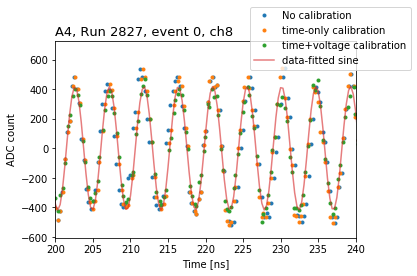

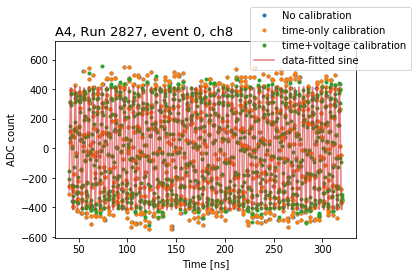

In [251]:
if pol==0:
    params=SineFit(time[1],voltage[1],0.218)
    params
    plt.figure()
    plt.plot(time[1],voltage[1], ".",label="No calibration")
    plt.plot(time_final[1]+time[1][0],voltage[1],"." ,label="time-only calibration")
    plt.plot(time_final[1]+time[1][0],voltage_final[1],".",label="time+voltage calibration")
    plt.plot(time[1], SineFunc(time[1],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
    plt.legend(bbox_to_anchor=(1.2, 1.2), loc='upper right', ncol=1)
    plt.title("A4, Run 2827, event 0, ch8", loc="left", fontsize=13)
    plt.ylabel("ADC count")
    plt.xlabel("Time [ns]")
    plt.xlim(200,240)
    plt.tight_layout()
    plt.figure()
    plt.plot(time[1],voltage[1], ".",label="No calibration")
    plt.plot(time_final[1]+time[1][0],voltage[1],"." ,label="time-only calibration")
    plt.plot(time_final[1]+time[1][0],voltage_final[1],".",label="time+voltage calibration")
    plt.plot(time[1], SineFunc(time[1],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
    plt.legend(bbox_to_anchor=(1.2, 1.2), loc='upper right', ncol=1)
    plt.title("A4, Run 2827, event 0, ch8", loc="left", fontsize=13)
    plt.ylabel("ADC count")
    plt.xlabel("Time [ns]")
#     plt.xlim(50,80)
    plt.tight_layout()
    
if pol==1:
    params=SineFit(time[1][1::2],voltage[1][1::2],0.218)
    params

    plt.figure()
    plt.plot(time[1][1::2], voltage[1][1::2], label='Data')
# plt.scatter(time_final[1], voltage[1], label='Data')

    plt.plot(time[1][1::2],SineFunc(time[1][1::2],params[0],params[1],params[2]),label='Fitted function')
    plt.plot(time_final[1][9::2]+time[1][0],voltage_final[1],"--",label='Somehow calibrated?')
#     plt.xlim(50,300)
    plt.legend()
    
    plt.figure()
    plt.plot(time[1][1::2], voltage[1][1::2], label='Data')
# plt.scatter(time_final[1], voltage[1], label='Data')

    plt.plot(time[1][1::2],SineFunc(time[1][1::2],params[0],params[1],params[2]),label='Fitted function')
    plt.plot(time_final[1][9::2]+time[1][0],voltage_final[1],"--")
#     plt.ylim(-600,600)

In [105]:
print(time_final[1][2]-time_final[1][0])

0.7236901763854016


# Final plots

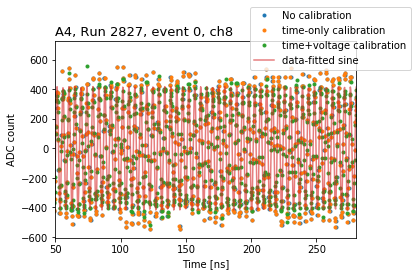

In [252]:
plt.plot(time[1],voltage[1], ".",label="No calibration")
plt.plot(time_final[1]+time[1][0],voltage[1],"." ,label="time-only calibration")
plt.plot(time_final[1]+time[1][0],voltage_final[1],".",label="time+voltage calibration")
plt.plot(time[1], SineFunc(time[1],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
plt.legend(bbox_to_anchor=(1.2, 1.2), loc='upper right', ncol=1)
plt.title("A4, Run 2827, event 0, ch8", loc="left", fontsize=13)
plt.ylabel("ADC count")
plt.xlabel("Time [ns]")
plt.xlim(50,280)
plt.tight_layout()
# plt.savefig("calib_Run2827_ev0_ch8.png", dpi=200)

## For Vpols we use both odd and even blocks.

(200, 300)

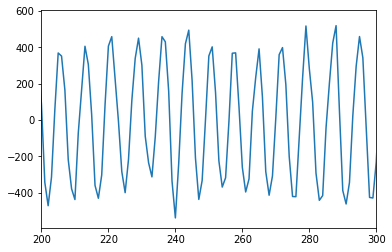

In [253]:
plt.plot(voltage[0][1::2])

# plt.plot(voltage_final[1])
plt.xlim(200,300)

In [99]:
np.shape(time), np.shape(time_final)

((1994, 896), (1994, 791))

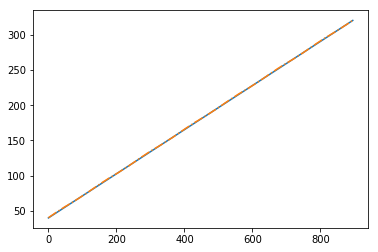

In [255]:
plt.plot(time[0])
plt.plot(time_final[0]+time[0][1],"-.")

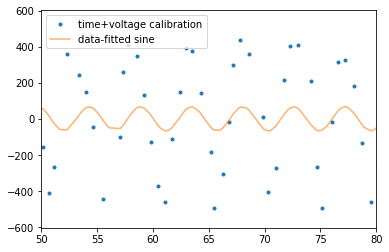

In [401]:
params = SineFit(time_final[1][1::2],voltage_2[1][1::2],0.218)
# plt.plot(time_final[1],voltage_2[1])
# plt.plot(time_final[1][1::2],SineFunc(time_final[1][1::2],params[0],params[1],params[2]),label='Fitted function')
# plt.plot(time[2][1::2]-time[1][0],voltage[1][1::2])
# plt.plot(time[1],voltage[1],".")
# plt.plot(time_final[1]+time[1][0],voltage[1],"." ,label="time-only calibration")
plt.plot(time_final[1][1::2]+time[1][0],voltage_2[1][1::2],".",label="time+voltage calibration")
plt.plot(time_final[1]+time[1][0], SineFunc(time_final[1],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
plt.xlim(50,80)
plt.legend()

## For Hpols we only use odd blocks to calibrate

(30, 70)

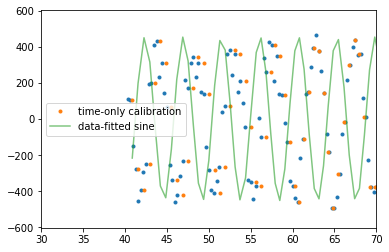

In [324]:
params = SineFit(time_final[1][1::2],voltage_2[1][1::2],0.218)
plt.plot(time[1],voltage[1],".")
plt.plot(time_final[1][1::2]+time[1][1],voltage[1][1::2],"." ,label="time-only calibration")
# plt.plot(time_final[1][1::2]+time[1][0],voltage_2[1][1::2],".",label="time+voltage calibration")
plt.plot(time_final[1][1::2]+time[1][1], SineFunc(time_final[1][1::2],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
plt.xlim(50,80)
plt.legend()
plt.xlim(30,70)

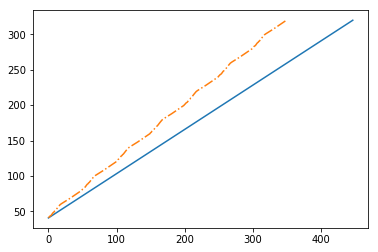

In [202]:
plt.plot(time[0][1::2])
plt.plot(time_final[0][1::2]+time[0][1],"-.")

In [120]:
np.shape(time), np.shape(time_final), np.shape(voltage_2)

((1994, 896), (1994, 700), (1994, 700))

In [111]:
delta=[]
for i in range(1,len(time_final[0])):
    delta.append(time_final[0][i]-time_final[0][i-1])

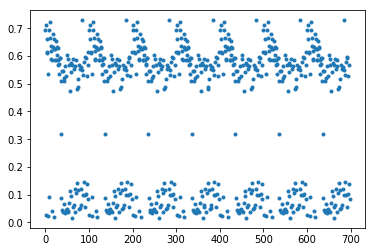

In [230]:
plt.plot(delta,".")
# plt.plot(time_final[0][1::2])
# time_final[0::2]

(20, 80)

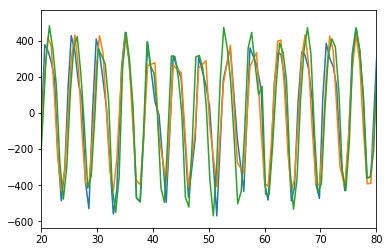